In [2]:
import pandas as pd
import numpy as np

#import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
palette = {0: 'indianred', 1: 'steelblue'}

#load the dataset "final_dataset_Nov_9.csv"
df = pd.read_csv("../Lee/lee_full_dataset.csv")

df

STUDENT                      MAJOR  104  105  140  143  145  150  151  \
0           0                   Chemisty  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1           3  Liberal Arts and Sciences  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2           4           Computer Science  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3           5            Interior Design  0.0  0.0  2.0  0.0  0.0  0.0  0.0   
4           7                 Psychology  4.0  0.0  0.0  0.0  0.0  0.0  0.0   
...       ...                        ...  ...  ...  ...  ...  ...  ...  ...   
9369    13059                 Psychology  0.0  0.0  3.0  0.0  0.0  1.0  0.0   
9370    13060                    English  0.0  0.0 -1.0  0.0  0.0 -3.0  0.0   
9371    13061                 Psychology  0.0  0.0  0.0  0.0  0.0  2.0  0.0   
9372    13062       Comunication Studies  0.0  0.0  0.0  0.0  0.0 -4.0  0.0   
9373    13063                  Marketing  0.0  0.0  0.0  0.0  0.0  2.0  5.0   

      160  ...  317  350  365  373  385  414  415  435  436  GRADUATE  
0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         1  
1     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         0  
2     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         1  
3     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         0  
4     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         1  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...  
9369  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         1  
9370  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         0  
9371  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         0  
9372  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         1  
9373  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         0  

[9374 rows x 31 columns]

In [3]:
cols = df.columns.tolist()
cols

['STUDENT',
 'MAJOR',
 '104',
 '105',
 '140',
 '143',
 '145',
 '150',
 '151',
 '160',
 '165',
 '166',
 '201',
 '207',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '350',
 '365',
 '373',
 '385',
 '414',
 '415',
 '435',
 '436',
 'GRADUATE']

In [4]:
courses = ['104',
 '105',
 '140',
 '143',
 '145',
 '150',
 '151',
 '160',
 '165',
 '166',
 '201',
 '207',
 '265',
 '266',
 '267',
 '301',
 '302',
 '304',
 '314',
 '317',
 '350',
 '365',
 '373',
 '385',
 '414',
 '415',
 '435',
 '436']

gen_course_dict={   
    '104': 'INTRO TO PROBABILTY',
    "105": "INTRO TO MATH IDEA",
    "140": "COLLEGE ALGEBRA",
    "143": "PREP FOR CALCULUS",
    "145": "APPLD TRIGONOMETR",
    "150": "DISC MATH BUS&SOC S",
    "151": "BUS & SOC SCI CALC",
    "160": "SURVEY OF CALCULUS",
    "165": "CALCULUS I",
    "166": "CALCULUS II",
    "207": "MATRCES&LINEAR ALGB",
    "265": "CALCULUS III",
    "266": "ELEM DIFF EQUATNS",
    "267": "DIFF EQ & TRANSFMS"
    }

math_course_dict = {
    "101": "ORIENTATION IN MATH",
    "201": "INTRO TO PROOFS",
    "240": "INVESTM&CREDIT MATH",
    "301": "ABSTRACT ALGEBRA I",
    "302": "ABSTRCT ALGEBRA II",
    "304": "COMBINATORICS",
    "314": "GRAPH THEORY",
    "317": 'THRY LINEAR ALGEBRA',
    "350": "NUMBER THEORY",
    '341': 'INTR THY PROBAB&S I',
    '342': 'INTR THY PR&STAT II',
    "365": "COMPLEX VARIABLES",
    "373": "INTR SCIENTF CMPTNG",
    "385": "INTR PART DIFF EQUA",
    "397": "IV MATH TCH SECDY",
    "414": "ANALYSIS I",
    "415": "ANALYSIS II",
    "435": "GEOMETRY I",
    "436": "GEOMETRY II",
    "497": "TEACH SEC SCHL MATH"
    }

gen_prereqs = {'143':['140'],
               '160':['145'],
               '165':['143','140'],
               '166':['165','143','140'],
               '207':['165','143','140'],
               '265':['166','165','143','140'],
               '266':['265','166','165','143','140'],
               '267':['265','166','165','143','140']
               }

math_prereqs = {'304':['201'],
                '314':['201'],
                '317':['201'],
                '350':['201'],
                '414':['201'],
                '435':['201'],
                '436':['201'],
                '301':['317','201'],
                '407':['317','201'],
                '415':['414','201'],
                '302':['301','317','201'],
                '397':['301','317','201']
                }

gen_courses = list(set(gen_course_dict.keys()).intersection(courses))
math_courses = list(set(math_course_dict.keys()).intersection(courses))

# #diplay the general and math courses
# print(f'General Courses: {gen_courses}')
# print(f'Math Courses: {math_courses}')

#for any general course not appearing as a key in gen_prereqs, add it with an empty list as the value; do the same for math courses and the math_prereqs dictionary
for course in gen_courses:
    if course not in gen_prereqs.keys():
        gen_prereqs[course] = []
for course in math_courses:
    if course not in math_prereqs.keys():
        math_prereqs[course] = []
#sort the prereq dictionaries by keys after dropping the keys not appearing in the respective list of courses
gen_prereqs = dict(sorted({k: v for k, v in gen_prereqs.items() if k in gen_courses}.items()))
math_prereqs = dict(sorted({k: v for k, v in math_prereqs.items() if k in math_courses}.items()))
# math_prereqs

In [5]:
# Loop through the semesters
for i in range(1, 9):
    # Create a new column for the semester
    df[f'SEM{i}_gen'] = df[gen_courses].apply(lambda x: x.tolist().count(i) - x.tolist().count(-i), axis=1)
    df[f'SEM{i}_math'] = df[math_courses].apply(lambda x: x.tolist().count(i) - x.tolist().count(-i), axis=1)
    df[f'SEM{i}'] = df[f'SEM{i}_gen'] + df[f'SEM{i}_math']

# Create cumulative sum columns for each semester. This will give us the total number of courses passed by the student up to that semester. In particular, the final column will give us the total number of courses passed by the student within 8 semesters.
df[[f'SEM{i}_gen_cdf' for i in range(1, 9)]] = df[[f'SEM{i}_gen' for i in range(1, 9)]].cumsum(axis=1)
df[[f'SEM{i}_math_cdf' for i in range(1, 9)]] = df[[f'SEM{i}_math' for i in range(1, 9)]].cumsum(axis=1)
df[[f'SEM{i}_cdf' for i in range(1, 9)]] = df[[f'SEM{i}' for i in range(1, 9)]].cumsum(axis=1)

# For each student, calculate a line of best fit for the pairs (i, SEM_i_cumulative) for i = 1, 2, ..., 8
# Create new columns to store the slope and intercept of the line of best fit
df[['slp','int','slp_gen','int_gen','slp_math','int_math']] = 0.0

x = np.array(range(1, 9))
# Loop through the rows of the DataFrame
for i, row in df.iterrows():
    #y values
    y = row[[f'SEM{j}_cdf' for j in range(1, 9)]].astype(float)
    y_gen = row[[f'SEM{j}_gen_cdf' for j in range(1, 9)]].astype(float)
    y_math = row[[f'SEM{j}_math_cdf' for j in range(1, 9)]].astype(float)
    # Calculate the slope and intercept
    S,I = np.polyfit(x, y, 1)
    S_gen, I_gen = np.polyfit(x, y_gen, 1)
    S_math, I_math = np.polyfit(x, y_math, 1)
    # Store the values in the DataFrame
    df.at[i, 'slp'] = S
    df.at[i, 'int'] = I
    df.at[i, 'slp_gen'] = S_gen
    df.at[i, 'int_gen'] = I_gen
    df.at[i, 'slp_math'] = S_math
    df.at[i, 'int_math'] = I_math

# #create a dataframe containing those students for whom SEM8_gen_cdf is greater than 0
# df_gen_pos = df[df['SEM8_gen_cdf'] > 0]
# df_gen_neg = df[df['SEM8_gen_cdf'] <= 0]
# df_math_pos = df[df['SEM8_math_cdf'] > 0]
# df_math_neg = df[df['SEM8_math_cdf'] <= 0]
# df_pos = df[df['SEM8_cdf'] > 0]
# df_neg = df[df['SEM8_cdf'] <= 0]

# #print lengths of all dataframes
# print(f'Length of df: {len(df)}')
# print(f'Length of df_gen_pos: {len(df_gen_pos)}')
# print(f'Length of df_gen_neg: {len(df_gen_neg)}')
# print(f'Length of df_math_pos: {len(df_math_pos)}')
# print(f'Length of df_math_neg: {len(df_math_neg)}')
# print(f'Length of df_pos: {len(df_pos)}')
# print(f'Length of df_neg: {len(df_neg)}')

In [6]:
#I want to compute some lists of students according to certain conditions. I will put all these lists into a dictionary.

S_dict = {'math_eq_0': df.index[df[math_courses].eq(0).all(axis=1)].tolist(),
          'math_geq_1': df.index[df[math_courses].abs().ge(1).any(axis=1)].tolist()}

In [7]:
#get a list of value_counts of SEM8_cdf
vc = df['SEM8_cdf'].value_counts().sort_index()
vc

SEM8_cdf
-3        9
-2      106
-1     1203
 0      419
 1     4716
 2     1479
 3      578
 4      308
 5      163
 6      106
 7       84
 8       80
 9       50
 10      41
 11      17
 12      11
 13       4
Name: count, dtype: int64

In [8]:
S_dict['SEM8_cdf_leq_0'] = df.index[df['SEM8_cdf'] <= 0].tolist()
S_dict['SEM8_cdf_eq_1'] = df.index[df['SEM8_cdf'] == 1].tolist()
S_dict['SEM8_cdf_eq_2'] = df.index[df['SEM8_cdf'] == 2].tolist()
S_dict['SEM8_cdf_geq_3'] = df.index[df['SEM8_cdf'] >= 3].tolist()

In [9]:
#for each list in S_dict, print the length of the list, and the mean value of 'GRADUATE' for the students in the list
for key, value in S_dict.items():
    print(f'{key}: {len(value)}, {df.loc[value, "GRADUATE"].mean()}')

math_eq_0: 8357, 0.4985042479358622
math_geq_1: 1017, 0.640117994100295
SEM8_cdf_leq_0: 1737, 0.3097294185377087
SEM8_cdf_eq_1: 4716, 0.5368956743002544
SEM8_cdf_eq_2: 1479, 0.5449628127112914
SEM8_cdf_geq_3: 1442, 0.6525658807212206


In [10]:
#for the math_eq_0 and math_geq_1 lists, compute their intersections with the SEM8_cdf_leq_0, SEM8_cdf_eq_1, SEM8_cdf_eq_2, and SEM8_cdf_geq_3 lists
#For each intersection, compute the mean value of 'GRADUATE' for the students in the intersection
#assemble the sizes of these lists, their intersections, and the mean values for all lists and their intersections, into a dataframe

#initialize a dictionary to store the sizes of the lists and their intersections
d = {}

#loop through the keys of S_dict
for key1 in ['math_eq_0', 'math_geq_1']:
    for key2 in ['SEM8_cdf_leq_0', 'SEM8_cdf_eq_1', 'SEM8_cdf_eq_2', 'SEM8_cdf_geq_3']:
        #compute the intersection of the lists corresponding to the keys key1 and key2
        intersection = list(set(S_dict[key1]).intersection(S_dict[key2]))
        #store the size of the intersection in the dictionary d
        d[f'{key1} and {key2}'] = [len(intersection) / len(df)*100, df.loc[intersection, 'GRADUATE'].mean()*100]
#add the sizes of the original lists, along with the mean value of y, to the dictionary
# for key in ['math_eq_0', 'math_geq_1', 'SEM8_cdf_leq_0', 'SEM8_cdf_eq_1', 'SEM8_cdf_eq_2', 'SEM8_cdf_geq_3']:
#     d[key] = [len(S_dict[key]) / len(df) * 100, df.loc[S_dict[key], 'GRADUATE'].mean() * 100]

#convert the dictionary d into a DataFrame
df_sizes = pd.DataFrame(d).T
df_sizes.columns = ['Size (%)', 'Grad rate (%)']
df_sizes['Weighted grad rate (%)'] = df_sizes['Size (%)'] * df_sizes['Grad rate (%)'] / 100
df_sizes['Weighted NG rate (%)'] = df_sizes['Size (%)'] * (100 - df_sizes['Grad rate (%)']) / 100
df_sizes

Size (%)  Grad rate (%)  \
math_eq_0 and SEM8_cdf_leq_0   17.825901      30.640335   
math_eq_0 and SEM8_cdf_eq_1    49.327928      53.871107   
math_eq_0 and SEM8_cdf_eq_2    14.646896      54.624909   
math_eq_0 and SEM8_cdf_geq_3    7.350117      59.941945   
math_geq_1 and SEM8_cdf_leq_0   0.704075      39.393939   
math_geq_1 and SEM8_cdf_eq_1    0.981438      44.565217   
math_geq_1 and SEM8_cdf_eq_2    1.130787      52.830189   
math_geq_1 and SEM8_cdf_geq_3   8.032857      70.119522   

                               Weighted grad rate (%)  Weighted NG rate (%)  
math_eq_0 and SEM8_cdf_leq_0                 5.461916             12.363985  
math_eq_0 and SEM8_cdf_eq_1                 26.573501             22.754427  
math_eq_0 and SEM8_cdf_eq_2                  8.000853              6.646042  
math_eq_0 and SEM8_cdf_geq_3                 4.405803              2.944314  
math_geq_1 and SEM8_cdf_leq_0                0.277363              0.426712  
math_geq_1 and SEM8_cdf_eq_1                 0.437380              0.544058  
math_geq_1 and SEM8_cdf_eq_2                 0.597397              0.533390  
math_geq_1 and SEM8_cdf_geq_3                5.632601              2.400256

In [54]:
new_dict = {'gen_leq_0': df.index[df['SEM8_gen_cdf'] <= 0].tolist(),
            # 'gen_eq_0': df.index[df['SEM8_gen_cdf'] == 0].tolist(),
            'gen_eq_12': df.index[df['SEM8_gen_cdf'].isin([1,2])].tolist(),
            'gen_geq_3': df.index[df['SEM8_gen_cdf'] >= 3].tolist(),
            'math_leq_0': df.index[df['SEM8_math_cdf'] <= 0].tolist(),
            'math_eq_12': df.index[df['SEM8_math_cdf'].isin([1,2])].tolist(),
            'math_geq_3': df.index[df['SEM8_math_cdf'] >= 3].tolist()}

In [55]:
#for each list in new_dict, print the length of the list, and the mean value of 'GRADUATE' for the students in the list
for key, value in new_dict.items():
    print(f'{key}: {len(value)/len(df) * 100}, {df.loc[value, "GRADUATE"].mean() * 100}')

gen_leq_0: 20.716876466823127, 34.449021627188465
gen_eq_12: 67.95391508427565, 54.662480376766084
gen_geq_3: 11.329208448901216, 62.71186440677966
math_leq_0: 90.19628760401109, 49.65109402720284
math_eq_12: 4.555152549605291, 53.161592505854806
math_geq_3: 5.248559846383614, 79.67479674796748


In [57]:
list(new_dict.keys())
gen_keys = ['gen_leq_0',
 'gen_eq_12',
 'gen_geq_3']
math_keys = ['math_leq_0','math_eq_12']

#compute all intersectoins of the lists corresponding to gen_keys with lists coreponsing to math_keys
#store the sizes of the intersections in a dictionary
d = {}
for key1 in gen_keys:
    for key2 in math_keys:
        intersection = list(set(new_dict[key1]).intersection(new_dict[key2]))
        d[f'{key1} and {key2}'] = [len(intersection) / len(df) * 100, df.loc[intersection, 'GRADUATE'].mean() * 100]
d['math_geq_3'] = [len(new_dict['math_geq_3']) / len(df) * 100, df.loc[new_dict['math_geq_3'], 'GRADUATE'].mean() * 100]
#convert the dictionary d into a DataFrame
df_genmath = pd.DataFrame(d).T
df_genmath.columns = ['Size (%)', 'Grad rate (%)']
df_genmath['Weighted grad rate (%)'] = df_genmath['Size (%)'] * df_genmath['Grad rate (%)'] / 100
df_genmath['Weighted NG rate (%)'] = df_genmath['Size (%)'] * (100 - df_genmath['Grad rate (%)']) / 100

#add a row at the end with the totals of each column
df_genmath.loc['Total'] = df_genmath.sum()

In [58]:
df_genmath

Size (%)  Grad rate (%)  Weighted grad rate (%)  \
gen_leq_0 and math_leq_0   18.231278      30.778233                5.611265   
gen_leq_0 and math_eq_12    1.418818      49.624060                0.704075   
gen_eq_12 and math_leq_0   64.412204      53.908579               34.723704   
gen_eq_12 and math_eq_12    1.429486      48.507463                0.693407   
gen_geq_3 and math_leq_0    7.552806      58.898305                4.448475   
gen_geq_3 and math_eq_12    1.706849      60.000000                1.024109   
math_geq_3                  5.248560      79.674797                4.181779   
Total                     100.000000     381.391437               51.386815   

                          Weighted NG rate (%)  
gen_leq_0 and math_leq_0             12.620013  
gen_leq_0 and math_eq_12              0.714743  
gen_eq_12 and math_leq_0             29.688500  
gen_eq_12 and math_eq_12              0.736079  
gen_geq_3 and math_leq_0              3.104331  
gen_geq_3 and math_eq_12              0.682739  
math_geq_3                            1.066780  
Total                                48.613185

In [38]:
df_genmath.sum()

Size (%)                  100.000000
Grad rate (%)             862.254475
Weighted grad rate (%)     51.386815
Weighted NG rate (%)       48.613185
dtype: float64

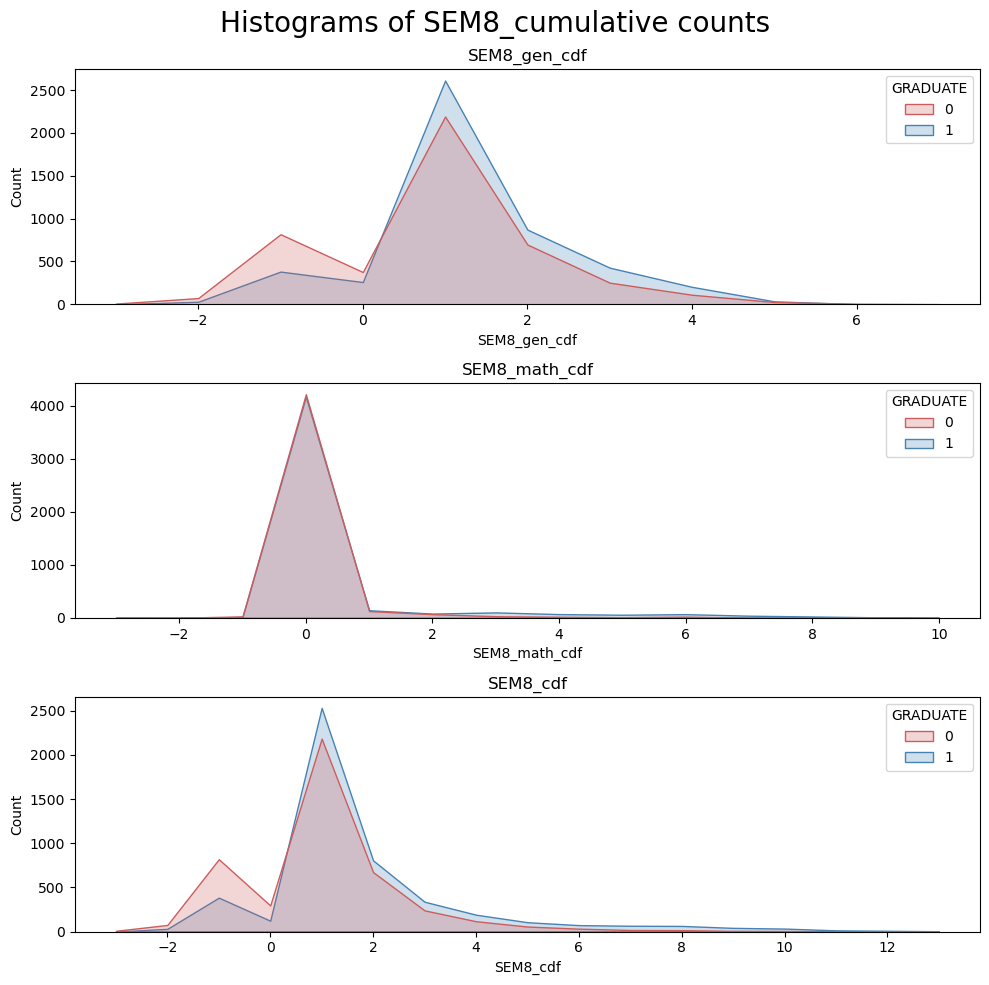

In [ ]:
# fig, axs = plt.subplots(3, 1, figsize=(10, 10))
# fig.suptitle('Histograms of SEM8_cumulative counts', fontsize=20)

# sns.histplot(data=df,
#              x='SEM8_gen_cdf', 
#              element='poly',
#              multiple='layer',
#              discrete=True,
#              palette=palette,
#              hue='GRADUATE',
#              ax=axs[0])
# axs[0].set_title('SEM8_gen_cdf')
# # axs[0].set_yscale('log')

# sns.histplot(data=df,
#              x='SEM8_math_cdf', 
#              multiple='layer',
#              element='poly',
#              discrete=True,
#              palette=palette,
#              hue='GRADUATE',
#              ax=axs[1])
# axs[1].set_title('SEM8_math_cdf')
# # axs[1].set_yscale('log')

# sns.histplot(data=df,
#              x='SEM8_cdf', 
#              multiple='layer',
#              element='poly',
#              discrete=True,
#              palette=palette,
#              hue='GRADUATE',
#              ax=axs[2])
# axs[2].set_title('SEM8_cdf')
# # axs[2].set_yscale('log')

# plt.tight_layout()
# plt.show()

Length of df: 9374
Length of df_gen_pos: 7432
Length of df_gen_neg: 1942
Length of df_math_pos: 919
Length of df_math_neg: 8455
Length of df_pos: 7637
Length of df_neg: 1737


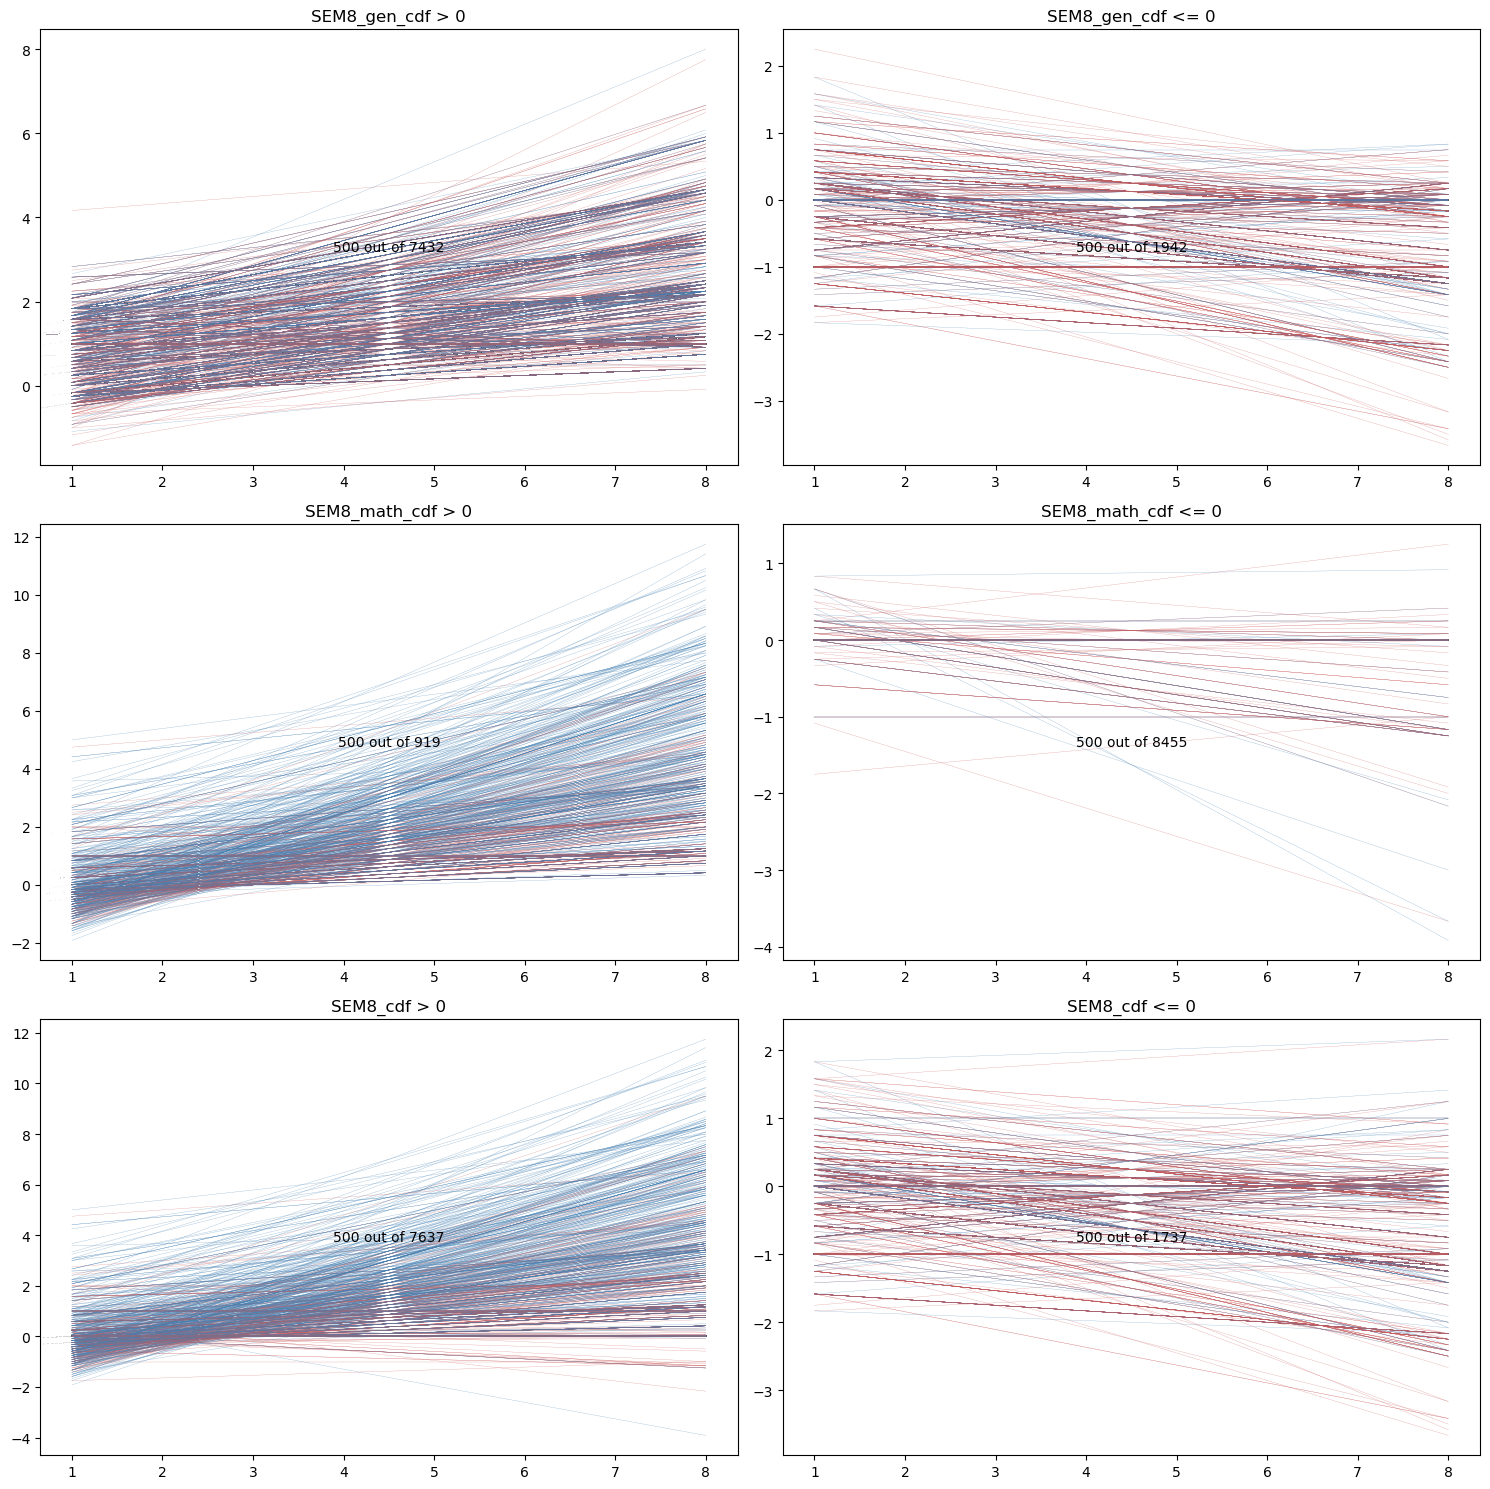

In [179]:
#visualize the lines of best fit for the students, set the hue to 'GRADUATE' and use the previously defined palette. Create a separate subplot for each of the dataframes df_gen_pos, df_gen_neg, df_math_pos, df_math_neg, df_pos, and df_neg (2 in each row


#make a figure and axes
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

#plot the lines of best fit for the students in df_gen_pos
sample = df_gen_pos.sample(500)
for i, row in df_gen_pos.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_gen']
    intercept = row['int_gen']
    axs[0, 0].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['GRADUATE']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[0,0].text(0.5, 0.5, f'{500} out of {len(df_gen_pos)}', horizontalalignment='center', verticalalignment='center', transform=axs[0,0].transAxes)
axs[0, 0].set_title('SEM8_gen_cdf > 0')

#plot the lines of best fit for the students in df_gen_neg
sample = df_gen_neg.sample(500)
for i, row in df_gen_neg.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_gen']
    intercept = row['int_gen']
    axs[0, 1].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['GRADUATE']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[0, 1].set_title('SEM8_gen_cdf <= 0')
axs[0,1].text(0.5, 0.5, f'{500} out of {len(df_gen_neg)}', horizontalalignment='center', verticalalignment='center', transform=axs[0,1].transAxes)

#plot the lines of best fit for the students in df_math_pos
sample = df_math_pos.sample(500)
for i, row in df_math_pos.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_math']
    intercept = row['int_math']
    axs[1, 0].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['GRADUATE']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[1, 0].set_title('SEM8_math_cdf > 0')
axs[1,0].text(0.5, 0.5, f'{500} out of {len(df_math_pos)}', horizontalalignment='center', verticalalignment='center', transform=axs[1,0].transAxes)

#plot the lines of best fit for the students in df_math_neg
sample = df_math_neg.sample(500)
for i, row in df_math_neg.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_math']
    intercept = row['int_math']
    axs[1, 1].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['GRADUATE']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[1, 1].set_title('SEM8_math_cdf <= 0')
axs[1,1].text(0.5, 0.5, f'{500} out of {len(df_math_neg)}', horizontalalignment='center', verticalalignment='center', transform=axs[1,1].transAxes)

#plot the lines of best fit for the students in df_pos
sample = df_pos.sample(500)
for i, row in df_pos.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_math']
    intercept = row['int_math']
    axs[2, 0].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['GRADUATE']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[2, 0].set_title('SEM8_cdf > 0')
axs[2,0].text(0.5, 0.5, f'{500} out of {len(df_pos)}', horizontalalignment='center', verticalalignment='center', transform=axs[2,0].transAxes)

#plot the lines of best fit for the students in df_neg
sample = df_neg.sample(500)
for i, row in df_neg.iterrows():
    x = np.array(range(1, 9))
    slope = row['slp_gen']
    intercept = row['int_gen']
    axs[2, 1].plot(x, 
                   slope * x + intercept, 
                   color=palette[row['GRADUATE']], 
                   alpha=0.7,
                   linewidth=0.2)
axs[2, 1].set_title('SEM8_cdf <= 0')
axs[2,1].text(0.5, 0.5, f'{500} out of {len(df_neg)}', horizontalalignment='center', verticalalignment='center', transform=axs[2,1].transAxes)

plt.tight_layout()
plt.show()

Length of df_MP: 919
Length of df_MN_GP: 6746
Length of df_MN_GN: 1709


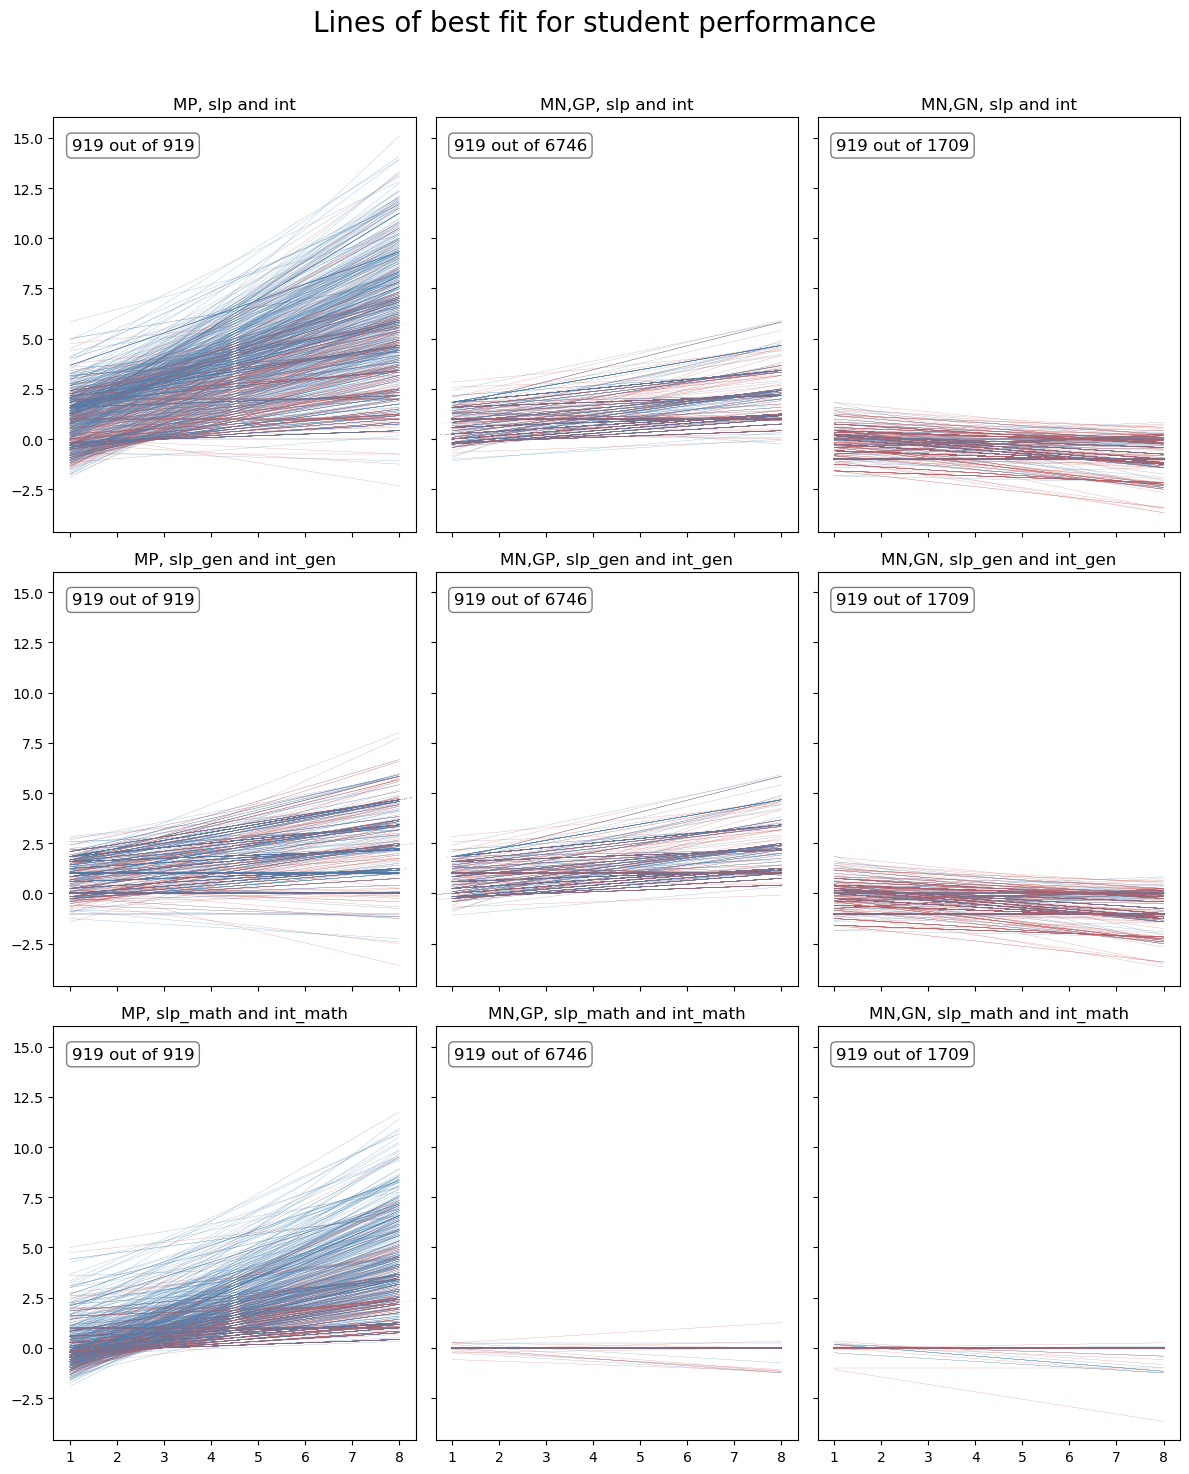

In [180]:
df_MP = df_math_pos
df_MN_GP = pd.merge(df_gen_pos, df_math_neg, how='inner')
df_MN_GN = pd.merge(df_gen_neg, df_math_neg, how='inner')

print(f'Length of df_MP: {len(df_MP)}')
print(f'Length of df_MN_GP: {len(df_MN_GP)}')
print(f'Length of df_MN_GN: {len(df_MN_GN)}')

fig, axs = plt.subplots(3, 3, figsize=(12, 15), sharex=True, sharey=True)
fig.suptitle('Lines of best fit for student performance', fontsize=20)

x = np.array(range(1, 9))

# Define the dataframes and the corresponding coefficients
dataframes = [df_MP, df_MN_GP, df_MN_GN]
coefficients = [('slp', 'int'), ('slp_gen', 'int_gen'), ('slp_math', 'int_math')]
titles = ['MP', 'MN,GP', 'MN,GN']

# Loop through the dataframes and coefficients to plot the lines of best fit
for col, df in enumerate(dataframes):
    sample = df.sample(919)
    for row, (slope_col, intercept_col) in enumerate(coefficients):
        for i, row_data in sample.iterrows():
            y = row_data[slope_col] * x + row_data[intercept_col]
            axs[row, col].plot(x, 
                               y, 
                               color=palette[row_data['GRADUATE']],
                               alpha=0.7,
                               linewidth=0.2)
        axs[row, col].set_title(f'{titles[col]}, {slope_col} and {intercept_col}')
        axs[row, col].text(0.05, 0.95, f"{len(sample)} out of {len(df)}", transform=axs[row, col].transAxes, fontsize=12,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


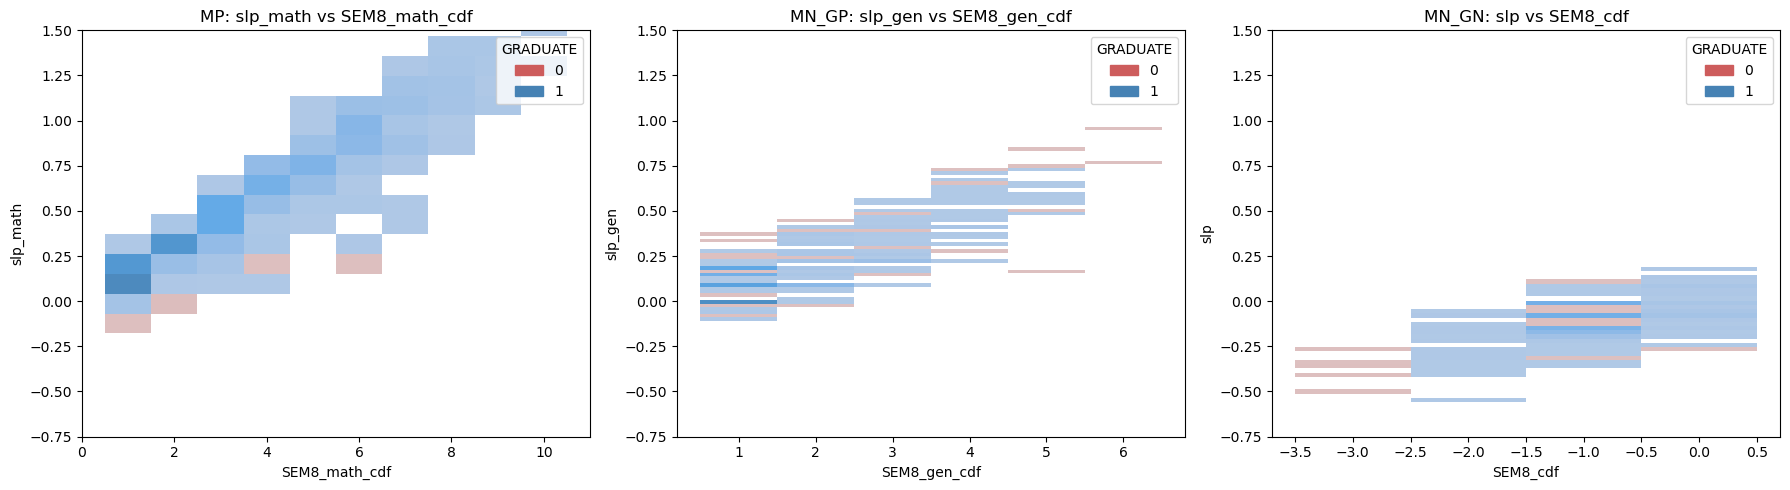

In [181]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# First subplot
sns.histplot(data=df_MP, y='slp_math', x='SEM8_math_cdf', hue='GRADUATE', palette=palette, ax=axs[0],discrete=(True, False))
axs[0].set_title('MP: slp_math vs SEM8_math_cdf')
axs[0].set_ylim(-0.75,1.5)

# Second subplot
sns.histplot(data=df_MN_GP, y='slp_gen', x='SEM8_gen_cdf', hue='GRADUATE', palette=palette, ax=axs[1],discrete=(True, False))
axs[1].set_title('MN_GP: slp_gen vs SEM8_gen_cdf')
axs[1].set_ylim(-0.75,1.5)

# Third subplot
sns.histplot(data=df, y='slp', x='SEM8_cdf', hue='GRADUATE', palette=palette, ax=axs[2],discrete=(True, False))
axs[2].set_title('MN_GN: slp vs SEM8_cdf')
axs[2].set_ylim(-0.75,1.5)

plt.tight_layout()
plt.show()

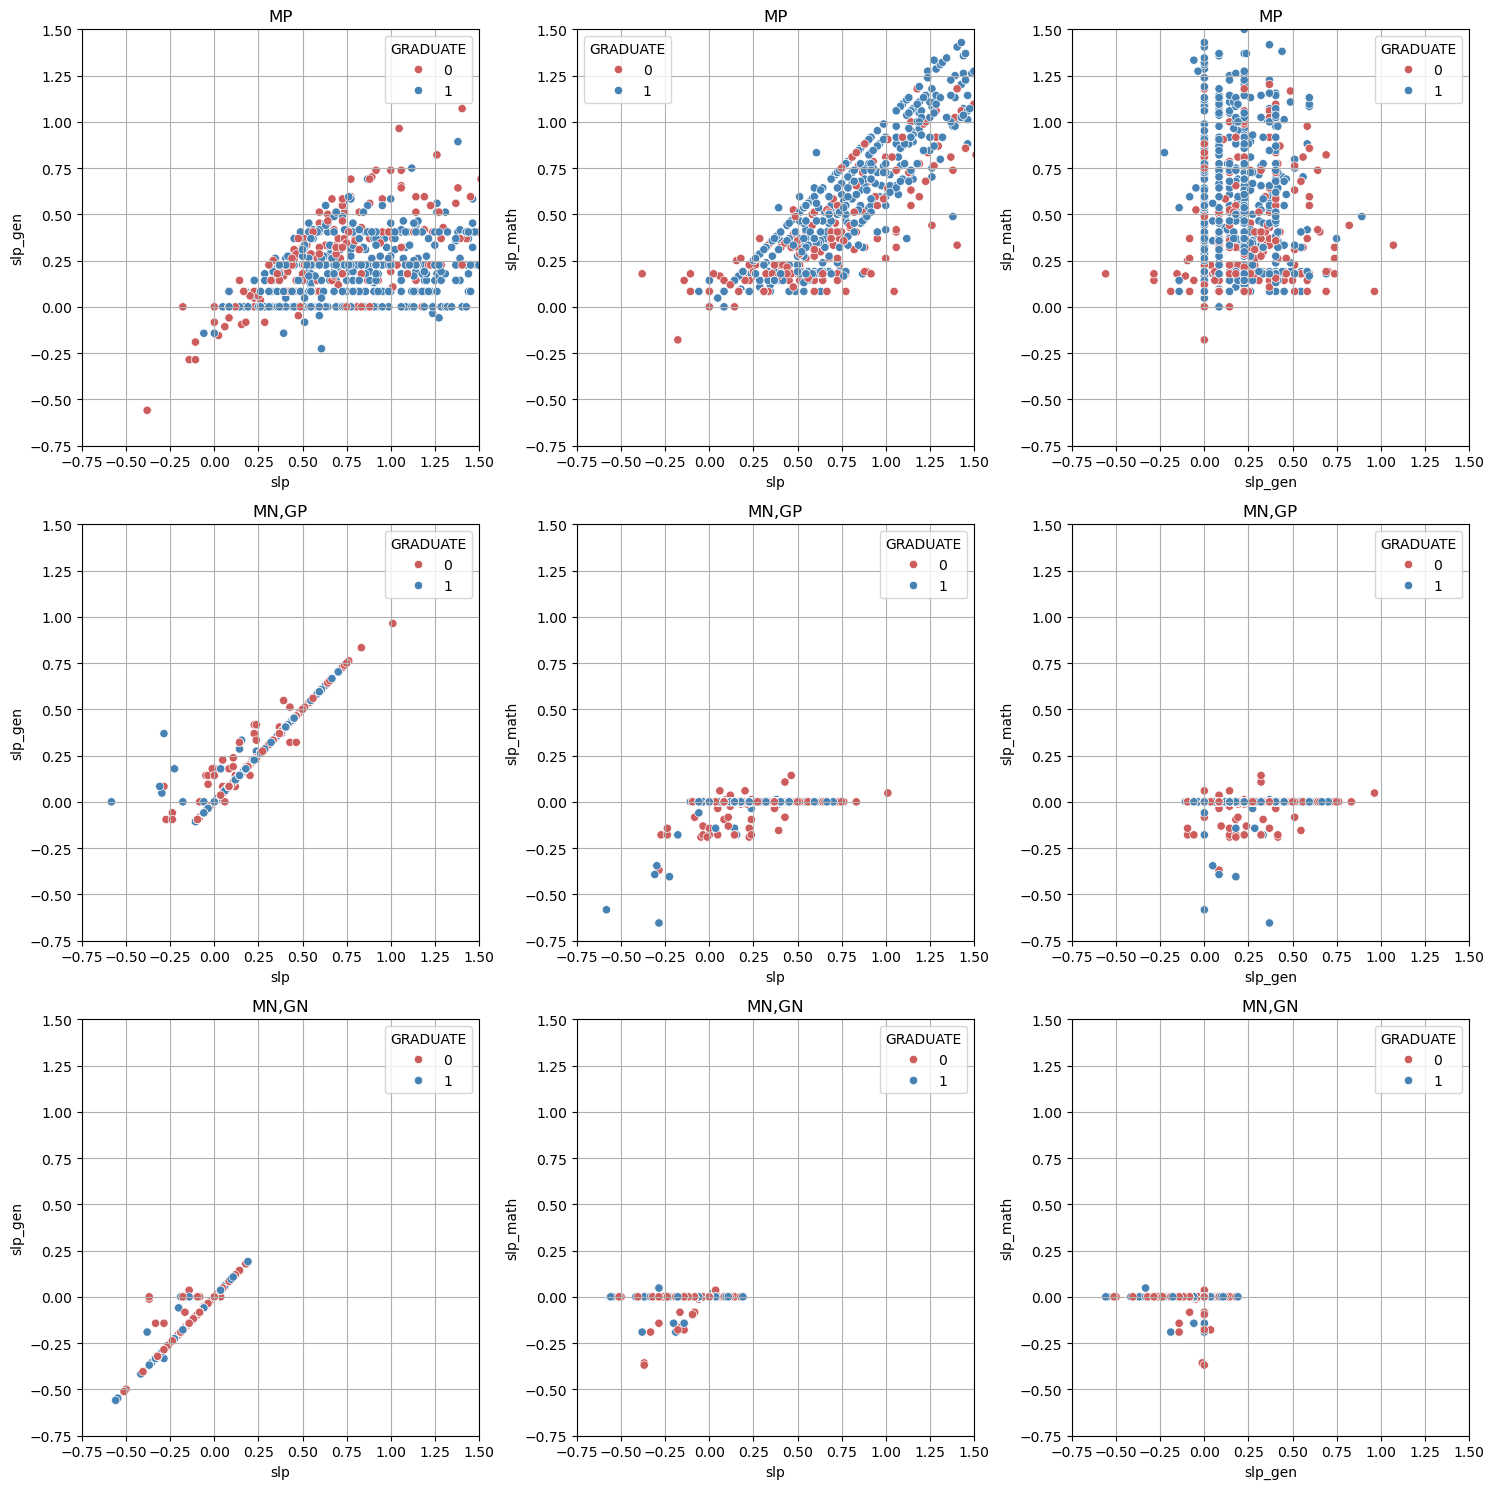

In [182]:
#make a 3x3 grid of subplots. Each row corresponds to a different dataframe: df_MP, df_MN_GP, and df_MN_GN. 
#Each column corresponds to a pair out of 'slp','slp_gen', and 'slp_math'.
#Make them scatter plots. Sharex and sharey. Set the hue to 'GRADUATE' and use the palette defined above.

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Define the dataframes and the corresponding coefficients
dataframes = [df_MP, df_MN_GP, df_MN_GN]
coeffs = ['slp', 'slp_gen', 'slp_math']
coeffs = [[coeffs[i], coeffs[j]] for i in range(2) for j in range(i+1,3)]
titles = ['MP', 'MN,GP', 'MN,GN']

# Loop through the dataframes and coefficients to plot the scatter plots
for row, df in enumerate(dataframes):
    for col, C in enumerate(coeffs):
        sns.scatterplot(data=df, 
                        x=C[0], 
                        y=C[1], 
                        hue='GRADUATE', 
                        palette=palette, 
                        ax=axs[row, col])
        axs[row, col].set_title(f'{titles[row]}')
        axs[row, col].set_xlabel(C[0])
        axs[row, col].set_ylabel(C[1])
        axs[row, col].set_ylim(-0.75,1.5)
        axs[row, col].set_xlim(-0.75,1.5)
        axs[row, col].grid(True)


plt.tight_layout()
plt.show()

In [183]:
#get a list of all students that passed at least one math course (i.e. at least one course in math_courses has a positive value)
df_math = df[df[math_courses].apply(lambda x: (x > 0).any(), axis=1)]

In [184]:
df_MP

STUDENT                MAJOR  104  105  140  143  145  150  151  160  \
5           9              Physics  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19         27     Computer Science  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
24         33  Nutritional Science  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
37         51          Mathematics  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
53         75          Mathematics  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
...       ...                  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9348    13031          Mathematics  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9349    13032          Mathematics  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9350    13033          Mathematics  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9351    13034     Computer Science  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9355    13039          Mathematics  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      ...  SEM5_cdf  SEM6_cdf  SEM7_cdf  SEM8_cdf       slp       int  \
5     ...         5         6         7         7  0.916667  0.250000   
19    ...         1         2         2         2  0.178571  0.571429   
24    ...         0         0         0         0  0.000000  0.000000   
37    ...         0         0         1         1  0.142857 -0.392857   
53    ...         7         8        10        13  1.678571 -1.428571   
...   ...       ...       ...       ...       ...       ...       ...   
9348  ...         4         4         4         4  0.261905  2.321429   
9349  ...         0         2         3         6  0.750000 -2.000000   
9350  ...         5         6         5         5  0.761905  0.321429   
9351  ...         3         3         3         3  0.261905  1.321429   
9355  ...         6         8        10         8  1.440476 -1.607143   

           slp_gen   int_gen  slp_math  int_math  
5     4.047619e-01  1.428571  0.511905 -1.178571  
19    7.773116e-17  1.000000  0.178571 -0.428571  
24   -1.428571e-01 -0.107143  0.142857  0.107143  
37    0.000000e+00  0.000000  0.142857 -0.392857  
53    5.952381e-01  1.071429  1.083333 -2.500000  
...            ...       ...       ...       ...  
9348  0.000000e+00  0.000000  0.261905  2.321429  
9349  0.000000e+00  0.000000  0.750000 -2.000000  
9350  2.261905e-01  0.607143  0.535714 -0.285714  
9351  8.333333e-02  1.500000  0.178571 -0.178571  
9355  4.047619e-01  0.428571  1.035714 -2.035714  

[919 rows x 85 columns]

In [187]:
#compare the students in  df_math with the students in df_MP, df_MN_GP, and df_MN_GN (find the intersections). Print the result
df_math_MP = pd.merge(df_math, df_MP, how='inner', on='STUDENT')
df_math_MN_GP = pd.merge(df_math, df_MN_GP, how='inner', on='STUDENT')
df_math_MN_GN = pd.merge(df_math, df_MN_GN, how='inner', on='STUDENT')

print(f'Length of df_math_MP: {len(df_math_MP)}')
print(f'Length of df_math_MN_GP: {len(df_math_MN_GP)}')
print(f'Length of df_math_MN_GN: {len(df_math_MN_GN)}')



Length of df_math_MP: 0
Length of df_math_MN_GP: 0
Length of df_math_MN_GN: 16


In [186]:
df_math

STUDENT                         MAJOR  104  105  140  143  145  150  \
99        834                       Finance  0.0  0.0  0.0  0.0  0.0  0.0   
220      1803                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
227      1846                       Physics  0.0  0.0  0.0  0.0  0.0  0.0   
286      2381                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
340      2775                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
471      3685     Liberal Arts and Sciences  0.0  0.0  0.0  0.0  0.0  0.0   
620      4761  World Languages and Cultures  0.0  0.0  0.0  0.0  0.0  0.0   
624      4780                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
770      5937                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
1006     7829                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
1304    10174                       Biology  0.0  0.0  0.0  0.0  0.0  0.0   
1346    10501                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
1363    10600                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
1370    10655              Computer Science  0.0  0.0  0.0  0.0  0.0  0.0   
1449    11186                   Mathematics  0.0  0.0  0.0  0.0  0.0  0.0   
1570    12060                     Economics  0.0  0.0  0.0  0.0  0.0  0.0   

      151  160  ...  SEM5_cdf  SEM6_cdf  SEM7_cdf  SEM8_cdf       slp  \
99    0.0  0.0  ...         0         0         0         0  0.000000   
220   0.0  0.0  ...         0         0         0         0  0.000000   
227   0.0  0.0  ...         0         0         0         0  0.023810   
286   0.0  0.0  ...         0         0         0         0 -0.059524   
340   0.0  0.0  ...         0        -1        -1         0 -0.095238   
471   0.0  0.0  ...        -1        -1        -2        -2 -0.285714   
620   0.0  0.0  ...         0         0         0         0  0.000000   
624   0.0  0.0  ...         0         0         0         0  0.000000   
770   0.0  0.0  ...         0         0         0         0  0.000000   
1006  0.0  0.0  ...         0         1         0         0  0.035714   
1304  0.0  0.0  ...        -1        -1        -1        -1 -0.190476   
1346  0.0  0.0  ...         0         0         0         0  0.000000   
1363  0.0  0.0  ...         0         1         0         0  0.035714   
1370  0.0  0.0  ...         0         0         0         0 -0.166667   
1449  0.0  0.0  ...         0        -1        -1        -1 -0.178571   
1570  0.0  0.0  ...         0        -1        -1         0 -0.095238   

           int   slp_gen   int_gen  slp_math  int_math  
99    0.000000  0.000000  0.000000  0.000000  0.000000  
220   0.000000  0.000000  0.000000  0.000000  0.000000  
227  -0.107143  0.000000  0.000000  0.023810 -0.107143  
286   0.642857 -0.047619  0.464286 -0.011905  0.178571  
340   0.178571  0.000000  0.000000 -0.095238  0.178571  
471   0.285714 -0.333333  0.250000  0.047619  0.035714  
620   0.000000  0.000000  0.000000  0.000000  0.000000  
624   0.000000  0.000000  0.000000  0.000000  0.000000  
770   0.000000  0.000000  0.000000  0.000000  0.000000  
1006 -0.035714  0.000000  0.000000  0.035714 -0.035714  
1304  0.357143  0.000000  0.000000 -0.190476  0.357143  
1346  0.000000  0.000000  0.000000  0.000000  0.000000  
1363 -0.035714  0.000000  0.000000  0.035714 -0.035714  
1370  1.000000 -0.083333  0.500000 -0.083333  0.500000  
1449  0.428571 -0.178571  0.428571  0.000000  0.000000  
1570  0.178571  0.000000  0.000000 -0.095238  0.178571  

[16 rows x 85 columns]

In [ ]:
# Initialize the dataframes
df3 = df[['STUDENT', 'GRADUATE']]
df3_gen = df[['STUDENT', 'GRADUATE']]
df3_math = df[['STUDENT', 'GRADUATE']]

# Create new columns to store the coefficients of the cubic polynomial
df3[['a3', 'a2', 'a1', 'a0']] = 0.0
df3_gen[['a3', 'a2', 'a1', 'a0']] = 0.0
df3_math[['a3', 'a2', 'a1', 'a0']] = 0.0

x = np.array(range(1, 9))

# Loop through the rows of the DataFrame
for i, row in df.iterrows():
    # y values
    y = row[[f'SEM{j}_cdf' for j in range(1, 9)]].astype(float)
    y_gen = row[[f'SEM{j}_gen_cdf' for j in range(1, 9)]].astype(float)
    y_math = row[[f'SEM{j}_math_cdf' for j in range(1, 9)]].astype(float)
    
    # Calculate the coefficients of the cubic polynomial
    coeffs = np.polyfit(x, y, 3)
    coeffs_gen = np.polyfit(x, y_gen, 3)
    coeffs_math = np.polyfit(x, y_math, 3)
    
    # Store the values in the DataFrame
    df3.at[i, 'a3'], df3.at[i, 'a2'], df3.at[i, 'a1'], df3.at[i, 'a0'] = coeffs
    df3_gen.at[i, 'a3'], df3_gen.at[i, 'a2'], df3_gen.at[i, 'a1'], df3_gen.at[i, 'a0'] = coeffs_gen
    df3_math.at[i, 'a3'], df3_math.at[i, 'a2'], df3_math.at[i, 'a1'], df3_math.at[i, 'a0'] = coeffs_math

In [ ]:
#plot samples of 500 from each of the 3 dataframes. color the samples based on the value of the 'GRADUATE' column like in the previous plot containing the lines of best fit

#make a figure and axis with 1 row and 3 columns
fig, ax = plt.subplots(1,3, figsize=(12,8))

#plot the samples from the first dataframe
sample = df3[df3['STUDENT'].isin(df_MN_GP['STUDENT'])].sample(700)
for i, row in sample.iterrows():
    ax[0].plot(x, row['a3'] * x**3 + row['a2'] * x**2 + row['a1'] * x + row['a0'], color=palette[row['GRADUATE']], alpha=0.1)
ax[0].set_title('All Courses')
ax[0].set_xlabel('Semester')   
ax[0].set_ylabel('Cumulative Courses Passed')

#plot the samples from the second dataframe
sample = df3_gen[df].sample(700)
for i, row in sample.iterrows():
    ax[1].plot(x, row['a3'] * x**3 + row['a2'] * x**2 + row['a1'] * x + row['a0'], color=palette[row['GRADUATE']], alpha=0.1)
ax[1].set_title('General Courses')
ax[1].set_xlabel('Semester')
ax[1].set_ylabel('Cumulative Courses Passed')

#plot the samples from the third dataframe
sample = df3_math.sample(700)
for i, row in sample.iterrows():
    ax[2].plot(x, row['a3'] * x**3 + row['a2'] * x**2 + row['a1'] * x + row['a0'], color=palette[row['GRADUATE']], alpha=0.1)
ax[2].set_title('Math Courses')
ax[2].set_xlabel('Semester')
ax[2].set_ylabel('Cumulative Courses Passed')

plt.tight_layout()
plt.show()

In [87]:
#create a new column in df which equals -1 if the student is in df_MN_GN, 0 if the student is in df_MN_GP, and 1 if the student is in df_MP
df['Performance'] = 0
df.loc[df.index.isin(df_MP.index), 'Performance'] = 1
df.loc[df.index.isin(df_MN_GN.index), 'Performance'] = -1

<Axes: xlabel='Performance', ylabel='Count'>

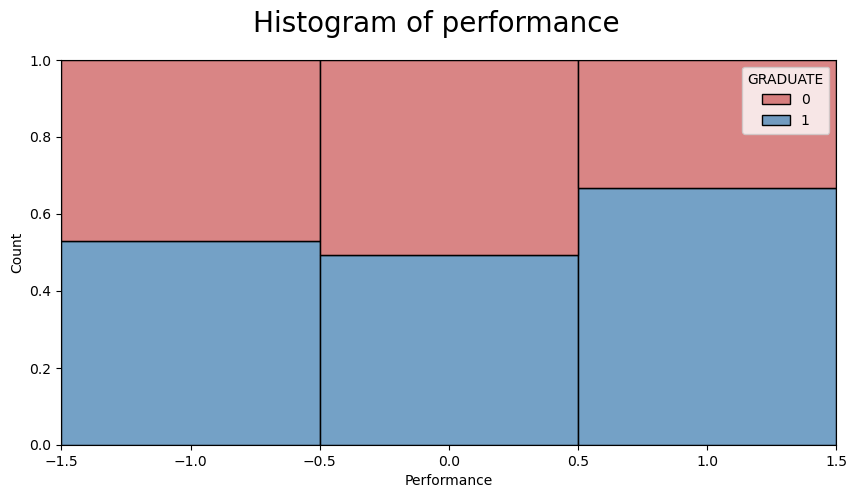

In [91]:
#plot a histogram of the Performance column. Set the hue to be the GRADUATE column and use the previously defined palette.

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
fig.suptitle('Histogram of performance', fontsize=20)

sns.histplot(data=df,
                x='Performance', 
                discrete=True,
                palette=palette,
                multiple='fill',
                hue='GRADUATE',
                ax=ax)

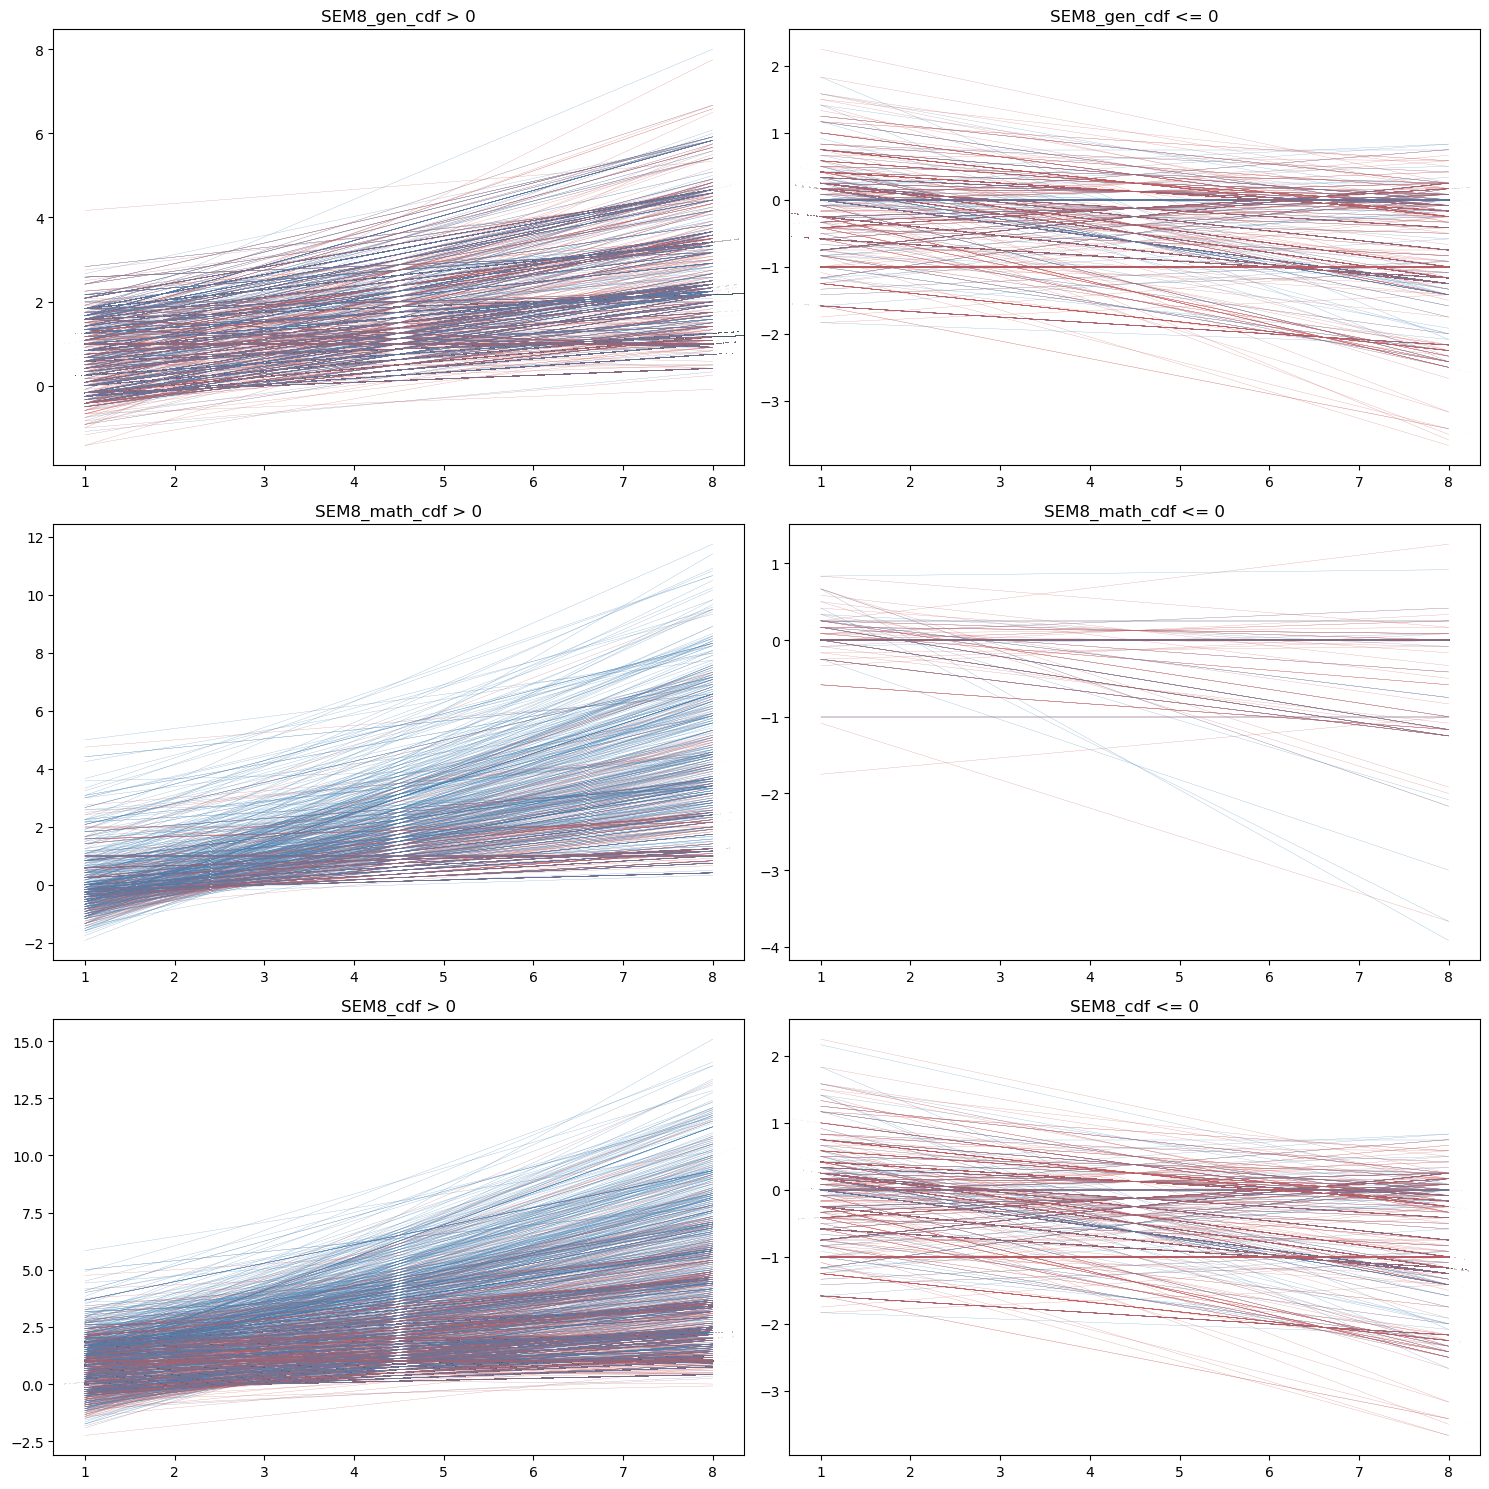

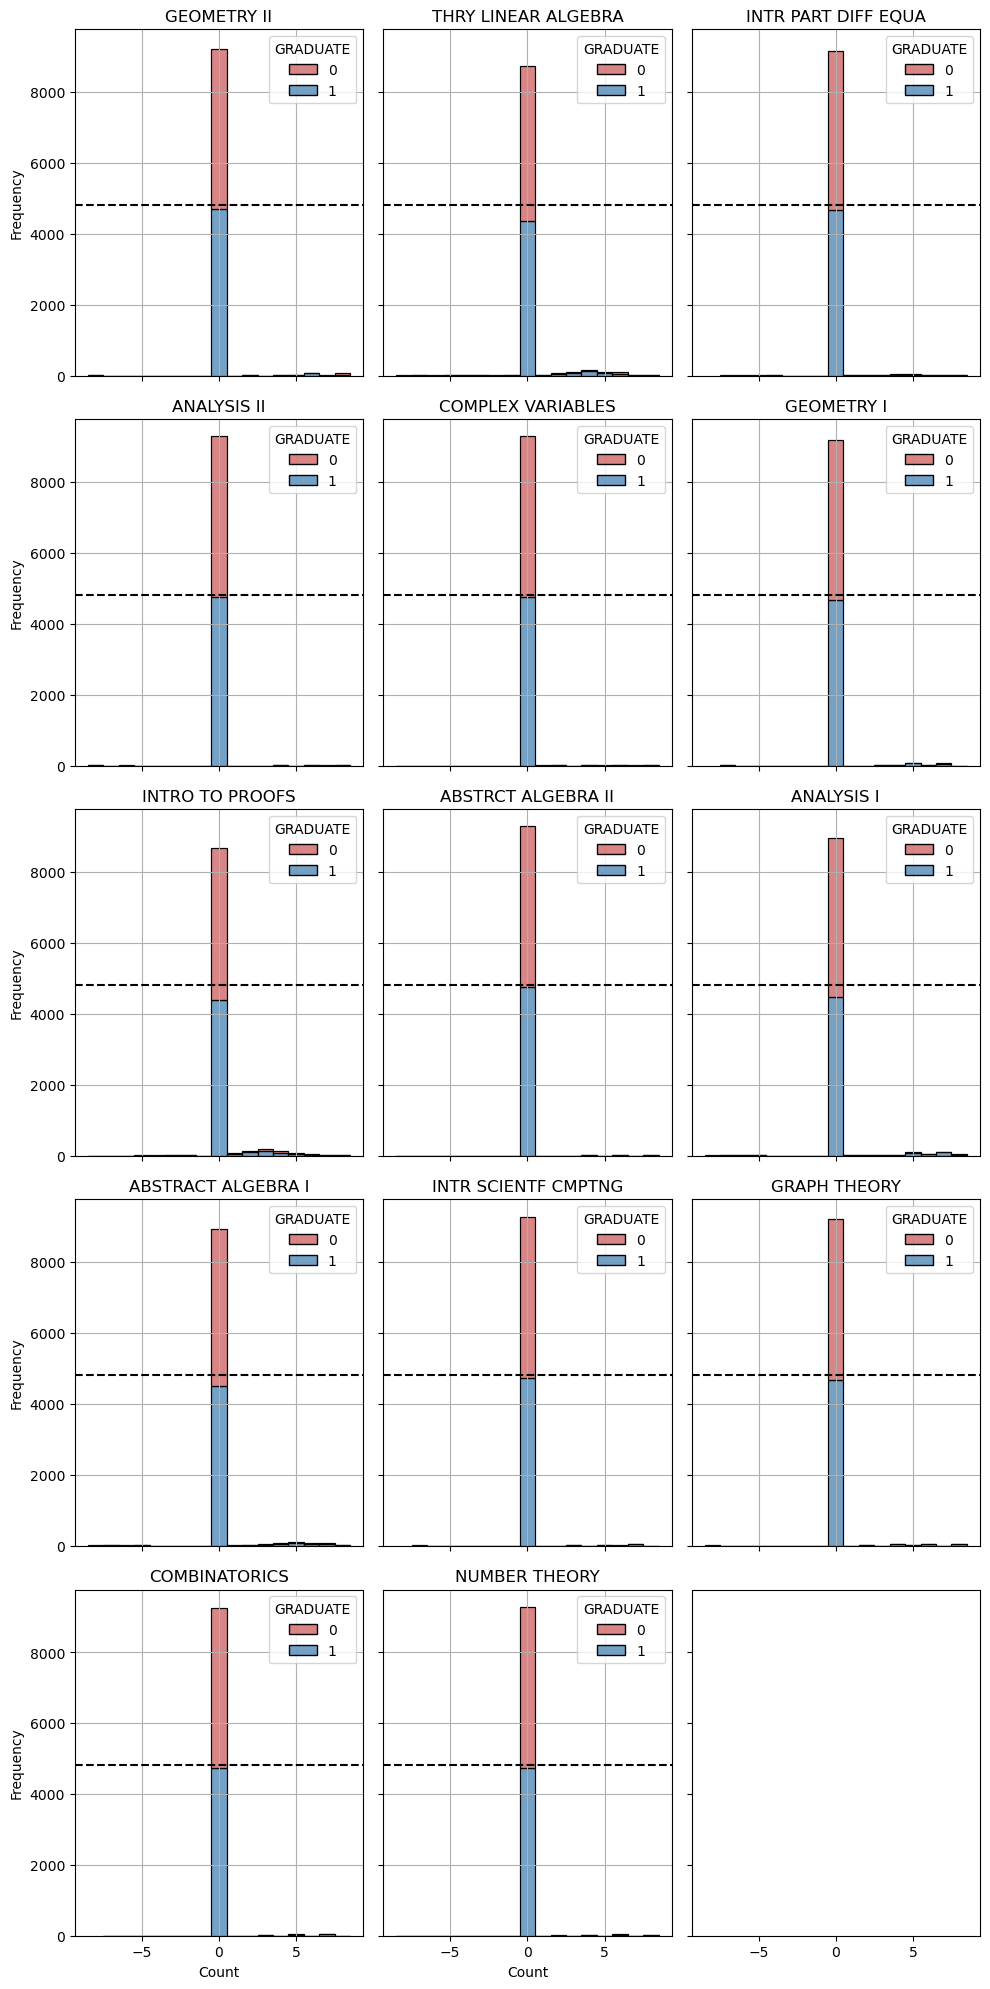

In [45]:
#visualize the distribution of the math courses in subplots. include the count in each bin of the histplot
fig, ax = plt.subplots(5,3, figsize=(10,20),sharex=True, sharey=True)
ax = ax.flatten()
for i, course in enumerate(math_courses):
    sns.histplot(df, 
                 x=course, 
                 ax=ax[i], 
                 hue='GRADUATE', 
                 palette=palette, 
                 element='bars', 
                 multiple='stack',
                 discrete=True)
    # for p in ax[i].patches:
    #     if p.get_height() > 0:
    #         ax[i].annotate(f'{int(p.get_height())}', 
    #                        (p.get_x() + p.get_width() / 2., p.get_height() + 5), 
    #                        ha='center', va='baseline')
    #draw a horizontal line at the number of students in the dataset who have y=1
    ax[i].axhline(df['GRADUATE'].sum(), color='black', linestyle='--')
    ax[i].set_title(f'{math_course_dict[course]}')
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Frequency')
    ax[i].grid(True)
plt.tight_layout()
plt.show()

In [46]:
#create a dataframe whose index is the math courses and the columns are -8, -7, ..., 7, 8. The value in the (i, j) entry of the DataFrame should be the number of students who took course i in semester j.
math_semester_counts = pd.DataFrame(index=math_courses, columns=range(-8, 9))
for course in math_courses:
    for i in range(-8, 9):
        math_semester_counts.at[course, i] = df[df[course] == i].shape[0]

math_semester_counts['non-zero'] = len(df) - math_semester_counts[0]
math_semester_counts.sort_values('non-zero', ascending=False, inplace=True)

#do the same for the general courses
gen_semester_counts = pd.DataFrame(index=gen_courses, columns=range(-8, 9))
for course in gen_courses:
    for i in range(-8, 9):
        gen_semester_counts.at[course, i] = df[df[course] == i].shape[0]

gen_semester_counts['non-zero'] = len(df) - gen_semester_counts[0]
gen_semester_counts.sort_values('non-zero', ascending=False, inplace=True)

In [47]:
math_semester_counts

-8  -7 -6  -5  -4  -3  -2 -1     0   1    2    3    4    5   6    7   8  \
201  1   2  3   7   8  10  12  3  8671  73  142  179  118   67  37   20  21   
317  5   7  9   9  23   5   3  2  8738  20   59   97  155  105  89   28  20   
301  7  11  9  21   2   2   2  1  8940   8   15   36   63   94  67   68  28   
414  8  22  6  11   1   2   0  1  8960   4    8   31   28   92  41  107  52   
385  0   2  2   2   6   0   1  1  9155   5   21   28   48   35  28   19  21   
435  0  11  0   1   0   0   0  0  9184   2    1   14    7   78   6   68   2   
436  6   0  0   0   1   0   0  0  9197   0    3    1   20    6  70    3  67   
314  7   0  4   0   2   0   1  0  9211   0   11    1   40    6  41    1  49   
304  0   3  0   2   0   0   0  0  9255   1    2   19    3   39   0   49   1   
373  0   6  0   0   1   0   0  0  9259   4    1    7    2   31   6   54   3   
350  3   0  1   1   1   0   1  0  9261   1    7    2   33    1  35    3  24   
365  1   0  0   0   1   1   1  0  9282   4    8    1   12    3  29    3  28   
415  3   1  3   0   0   0   0  0  9284   1    2    0   15    2  29    4  30   
302  2   0  2   0   2   0   0  0  9298   0    3    2   18    2  26    2  17   

    non-zero  
201      703  
317      636  
301      434  
414      414  
385      219  
435      190  
436      177  
314      163  
304      119  
373      115  
350      113  
365       92  
415       90  
302       76

In [48]:
gen_semester_counts

-8  -7  -6  -5  -4  -3   -2   -1     0     1    2    3    4    5   6   7  \
165   3   9  12   9  28  48  132  148  6740  1198  655  140  110   60  30  30   
166   5   9  11  31  47  99  108   32  7148   446  813  340  109  103  30  30   
265   1  13  14  34  39  68   26   23  7745   236  354  441  176   94  52  42   
143   0   2   2   9   4  20   76  179  7827   846  265   65   38   21  11   5   
140  13  12   8  11  16  26   38   71  8071   426  213  116   98   91  57  63   
104   6  12  16  19  11  53   36   20  8197   147  206  215  124  130  62  78   
150  10   9   9  16  19  31   46   40  8290   245  269  116  101   72  42  30   
207   9  20  15  23  21  21    9   13  8499    74   62  160  136  121  75  87   
267   1   4   5   8  24  12    9    4  8731    51  100  176  144   60  18  17   
105   3   9   7   5  12  13   22   25  8848   148  103   41   48   24  27  19   
266   3   2   6   2  10   9    2    2  8972    28   33   95   91   57  29  24   
160   4   1   4   6   9   6   11   11  9027    43   90   43   40   29  14  21   
151   2   1   1   4   3   2    1    3  9275     5   23   10   14    9   5  11   
145   0   0   1   0   3   2   12    2  9287    21   23    8    8    2   1   1   

      8 non-zero  
165  22     2634  
166  13     2226  
265  16     1629  
143   4     1547  
140  44     1303  
104  42     1177  
150  29     1084  
207  29      875  
267  10      643  
105  20      526  
266   9      402  
160  15      347  
151   5       99  
145   3       87

In [ ]:
#add a column named 'math_performance' which counts how many math courses have a positive value, minus the number of math courses having a negative value.
df['math_performance'] = df[math_courses].apply(lambda x: x.tolist().gt(0).sum() - x.tolist().lt(0).sum(), axis=1)
df['gen_performance'] = df[gen_courses].apply(lambda x: x.tolist().gt(0).sum() - x.tolist().lt(0).sum(), axis=1)

>0 gen course performance: 1918
<=0 gen course performance: 7456
<=0 gen courses passed: 1480
>0 gen courses passed: 7894
>0 math course performance: 8450
<=0 math course performance: 924
<=0 math courses passed: 8403
>0 math courses passed: 971


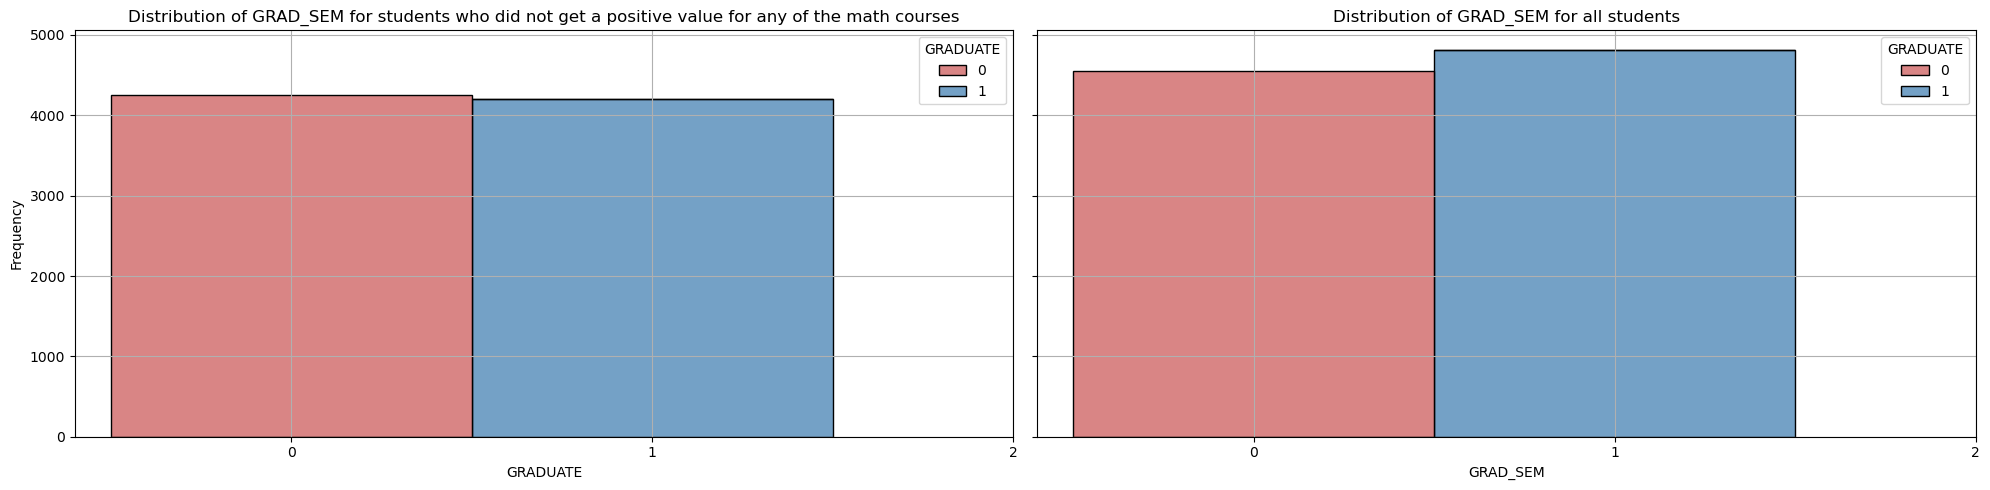

In [49]:
#visualize the distribution of GRAD_SEM given that the student did not get a positive value for any of of the courses in math_courses. Include the count in each bin of the histplot

#make a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(20, 5),sharey=True)

#plot the histogram for students who did not get a positive value for any of the math courses
sns.histplot(data=df[df[math_courses].sum(axis=1) <= 0], 
             x='GRADUATE',
             hue='GRADUATE',
             multiple='stack',
             palette=palette, 
             ax=axs[0],
             discrete=True)
axs[0].set_title('Distribution of GRAD_SEM for students who did not get a positive value for any of the math courses')  
axs[0].set_xlabel('GRADUATE')
axs[0].set_xticks([0, 1, 2])
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

#plot the histogram for all students
sns.histplot(data=df, 
             x='GRADUATE',
             hue='GRADUATE',
             multiple='stack',
             palette=palette, 
             ax=axs[1],
             discrete=True)
axs[1].set_title('Distribution of GRAD_SEM for all students')  
axs[1].set_xlabel('GRAD_SEM')
axs[1].set_xticks([0, 1, 2])
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()
plt.show()